Group Name: House Hunters               
Group members: Srivats Pulumati, Fernando Seanez, Yanzhen He
# Introduction
We want to talk about best/worst neighborhood in Pittsburgh based on the criminal datasets. 

To analyize and find the best/worst neighborhood, we use 3 submetic: 

# Submetric 1(Fernando Seanez)

# My Metric Explanation:

## Amount of Arrests:

As a group, we each measured different databases with different information, from the amount of firearms seized to even the number of crime incidents. As a group, we all had one established metric: to evaluate the "safeness" of each neighborhood and then determine the safest neighborhood. However, I measured the number of arrests per neighborhood, specifically by using the data set named Pittsburgh Police Arrest Data. By doing so, I used a bar graph to illustrate the data best.  

In [7]:
import pandas as pd
import geopandas 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# First I decided on importing the pandas library and then read the CSV file into a DataFrame named 'arrests'.
arrests = pd.read_csv("NeighborhoodArrest.csv")

# Then set the display option to show all rows when printing the DataFrame.

pd.set_option('display.max_rows', None)

# Next group the DataFrame 'arrests' by the column 'INCIDENTNEIGHBORHOOD' and get the count of occurrences in each group.

neighborhood_arrests = arrests.groupby('INCIDENTNEIGHBORHOOD').size()

# Next create a new DataFrame 'd2' with the count of crimes in each neighborhood.

d2 = pd.DataFrame( { "number of crimes comitted" : neighborhood_arrests } )

# Then reset the index of DataFrame 'd2'.

d2.reset_index(inplace=True)

# Next you rename the columns of DataFrame 'd2' to more meaningful names.

d2.columns = [ "Neighborhoods", "Number_of_Arrests_Made"]

# Then sort the DataFrame 'd2' based on the 'Number_of_Arrests_Made' column in ascending order.

d2 = d2.sort_values(by = 'Number_of_Arrests_Made')

# Finally I decided on printing the sorted DataFrame 'd2'.

print(d2)


FileNotFoundError: [Errno 2] No such file or directory: 'NeighborhoodArrest.csv'

## Submetric 2(Yanzhen He)
The dataset I chose are the Police incident Blotter (30days) and the Pittsburgh Police Firearm Seizures dataset. 

I have a graph showing the top five neighborhoods incidents frequencies and how they change by time
and a gragh showing the frequecy of firearm seizeures by neighborhood. 

In [3]:
file_path = 'Blotter Data.csv'  
df = pd.read_csv(file_path)

neighborhood_counts = df['INCIDENTNEIGHBORHOOD'].value_counts()

df['Hour'] = df['INCIDENTTIME'].apply(lambda x: int(x.split('T')[1].split(':')[0]))
grouped_data = df.groupby(['Hour', 'INCIDENTNEIGHBORHOOD']).size().unstack(fill_value=0)

# Calculate the total frequency for each neighborhood
total_by_neighborhood = grouped_data.sum(axis=0)

# Select the top five neighborhoods based on total frequency
top_neighborhoods = total_by_neighborhood.sort_values(ascending=False).head(5).index

# Filter the grouped_data for the top five neighborhoods
grouped_data_top5 = grouped_data[top_neighborhoods]

# Create a new DataFrame with the total frequency for each hour
total_by_hour = grouped_data_top5.sum(axis=1)

# Plot the frequency versus time for the top five neighborhoods
plt.figure(figsize=(12, 8))
grouped_data_top5.plot(kind='bar', stacked=True)
plt.plot(total_by_hour, color='black', linewidth=3, marker='o', label='Total')
plt.title('Incident Frequency by Hour and Top 5 Neighborhoods')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend(title='Neighborhood', bbox_to_anchor=(1, 1))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Blotter Data.csv'

Graph showing Top 5 neighborhoods change by time in a day

1. Central Business District (Blue) and South Side Flats (Orange) have taken the majority in this graph. 
2. South Side Flat at 0-3am had the highest frequecy of incident, even higher than than the CBD.
3. Indcident frequency usually increase in the afternoon 

This graph showing the average HIERARCHY of the incident at different time

In [4]:
# Read the CSV file
df = pd.read_csv("Firearm Seizures Data.csv")

filtered_data = df[df['year'].between(2020, 2023)]

# Calculate the total count for each neighborhood
neighborhood_counts = filtered_data.groupby('neighborhood')['total_count'].sum()

# Sort the data in descending order
neighborhood_counts = neighborhood_counts.sort_values(ascending=False)

# Create a statistical plot for the "neighborhood" data using the "total_count" column
plt.figure(figsize=(20, 8))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Firearm Seizures by Neighborhood (2020-2023)')
plt.xlabel('Neighborhood')
plt.ylabel('Total Count')
plt.show()

# Create a table
table = pd.DataFrame(neighborhood_counts)
table.columns = ['Total Count']
print(table)


FileNotFoundError: [Errno 2] No such file or directory: 'Firearm Seizures Data.csv'

## Submetric 3(Srivats Pulumati)

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# Jupyter Hub reads the dataset from the WRPDC Website that is downloaded as a .csv file
dataset = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")

#Calculates how many crime incidents have occured from 2016 to 2023 in all the neighborhoods of pittsburgh from the incident neighborhood column
crimeincidents_count = dataset['INCIDENTNEIGHBORHOOD'].value_counts()

#Prints out the values for the number of crime incidents for different neighborhoods in pittsburgh in descending order
print(crimeincidents_count)

Central Business District    19468
South Side Flats             18744
Carrick                      11731
Shadyside                     8602
Bloomfield                    8566
                             ...  
Ridgemont                      293
Troy Hill-Herrs Island         252
Outside County                 248
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 99
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


In [9]:
# Choosing the top 10 neighborhoods with the largest amount of crime incidents from the bar graph displayed above
Pittsburgh_neighborhoods = ['Central Business District', 'South Side Flats', 'Carrick', 'Shadyside', 'Bloomfield', 'East Liberty', 'Squirrel Hill South', 'Brookline', 'Mount Washington', 'Homewood South']
# Converting our INCIDENTTIME column to a datetime object from the string format YYYY-MM-DD
dataset['INCIDENTTIME'] = pd.to_datetime(dataset['INCIDENTTIME']) 
# Filtering the data in our data set to only include data from the month of November for when crime incidents occur in the neighborhoods of pittsburgh
neighborhood_filtered_data = dataset[(dataset['INCIDENTNEIGHBORHOOD'].isin(Pittsburgh_neighborhoods)) & (dataset['INCIDENTTIME'].dt.month == 11)]
# Using the UCR Hierarchy in my data set, we measure the number of the most severe crimes that have occured in these top 10 crime prone neighborhoods of Pittsburgh
average_amount_of_crime_rates = neighborhood_filtered_data.groupby('INCIDENTNEIGHBORHOOD')['HIERARCHY'].mean().sort_values(ascending=False)

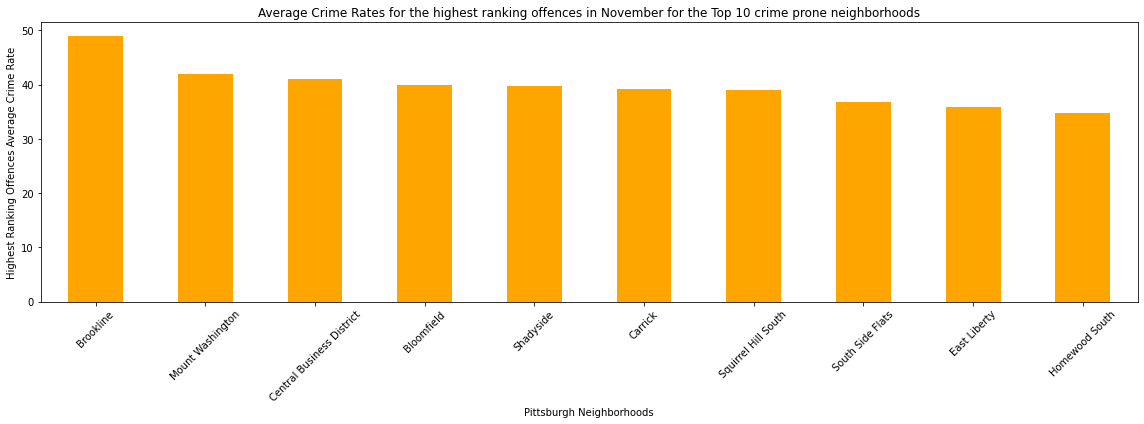

In [10]:
# Generates a 16 inches x 6 inches graph that shows the average crime rates for the most serious offences in the top 10 crime prone neighborhoods
plt.figure(figsize = (16, 6))
# Creates an orange colored bar graph that displays the average crime rates for the most serious offences in the top 10 crime prone neighborhoods
average_amount_of_crime_rates.plot(kind='bar', color = 'orange')
# Title of the bar graph
plt.title('Average Crime Rates for the highest ranking offences in November for the Top 10 crime prone neighborhoods')
# Label for describing the top 10 crime prone neighborhood names on the x- axis
plt.xlabel('Pittsburgh Neighborhoods')
# Label for describing the numbers on the y-axis
plt.ylabel('Highest Ranking Offences Average Crime Rate')
# Allows the names of the neighborhoods to be placed at 45 degree angle clockwise
plt.xticks(rotation = 45)
# Allows the title and the name of the neighborhoods on the x-axis to not overlap one another
plt.tight_layout()
# Displays the plot
plt.show()

# Final Analysis
Using all these dataset together we could set a formula for the danger rate
### The Fomula For Danger score 
Danger Score=Total Incident Frequency from Blotter Data+Total Firearm Seizures from Firearm Seizures Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_blotter = 'Blotter Data.csv'
file_path_firearm = 'Firearm Seizures Data.csv'
file_path_arrest =  "https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e" # Add the path to the Police Arrest dataset

# Read the CSV files
df_blotter = pd.read_csv(file_path_blotter)
df_firearm = pd.read_csv(file_path_firearm)
df_arrest = pd.read_csv(file_path_arrest)  # Read the Police Arrest dataset

# Process Blotter Data
neighborhood_counts_blotter = df_blotter['INCIDENTNEIGHBORHOOD'].value_counts()

df_blotter['Hour'] = df_blotter['INCIDENTTIME'].apply(lambda x: int(x.split('T')[1].split(':')[0]))
grouped_data_blotter = df_blotter.groupby(['Hour', 'INCIDENTNEIGHBORHOOD']).size().unstack(fill_value=0)

# Calculate the total frequency for each neighborhood in Blotter Data
total_by_neighborhood_blotter = grouped_data_blotter.sum(axis=0)

# Process Firearm Seizures Data
filtered_data_firearm = df_firearm[df_firearm['year'].between(2020, 2023)]

# Calculate the total count for each neighborhood in Firearm Seizures Data
neighborhood_counts_firearm = filtered_data_firearm.groupby('neighborhood')['total_count'].sum()

# Process Police Arrest Data
neighborhood_counts_arrest = df_arrest['INCIDENTNEIGHBORHOOD'].value_counts()

# Combine information from all datasets and calculate a danger score
danger_score = (
    total_by_neighborhood_blotter +
    neighborhood_counts_firearm +
    neighborhood_counts_arrest
).sort_values(ascending=False)

# Normalize the danger score to be between 0 and 1
normalized_danger_score = (danger_score - danger_score.min()) / (danger_score.max() - danger_score.min())

# Create a DataFrame for the top 5 neighborhoods with danger scores
top5_neighborhoods_table = pd.DataFrame({'Neighborhood': normalized_danger_score.head(5).index, 'Danger Score': normalized_danger_score.head(5).values})

# Create a bar chart for the normalized danger score
plt.figure(figsize=(20, 8))
normalized_danger_score.plot(kind='bar', color='red')
plt.title('Normalized Danger Score by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Normalized Danger Score')
plt.show()

# Display the table
print(top5_neighborhoods_table)

FileNotFoundError: [Errno 2] No such file or directory: 'Blotter Data.csv'